## Authenicete to twiter

In [1]:
!pip install -q snscrape

In [45]:
import os
import re
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

import string
import nltk
import warnings


In [3]:
today = date.today()
end_date = today
end_date

datetime.date(2022, 8, 10)

## Total Number of Tweets for Search Terms

In [4]:
search_term = 'zomato'
from_date = '2022-05-01'

In [5]:
os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size

print('Number Of Tweets : '+ str(counter))

Number Of Tweets : 4658


## Extract Exact Tweets

In [6]:
max_results = 1000

In [18]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

(0, "@zomato @Swiggy got bored of Zomato now moving to swiggy price as well as the service is different, that's fine but I am not able to understand 30min k order m 1:30min kese lge or fir order cancel kr k return lene m 3hrs it really pissed me off regret with Zomato https://t.co/afbe6saRoO")
(1, "@RohitavSharma @TheMariyana So you want them to stop sending notifications right?\\nWhy can't you delete those apps then?\\n\\nFlipkart and Zomato sends me many notifications daily here in Nepal, I don't use them at todays date. And you are teaching them how to do e-commerce business now, right?")
(2, "'@zomatocare Zomato company very very bad'")
(3, "'@shashank031188 @swiggy_in @ZomatoIN @zomatocare  @zomato  @deepigoyal \\nSir it is been 24 hours still not received  any  solution from your side your delivery  boy told me that cancel the order I an unable to delivery so I cancel the order till now I not received the refund  I have send mail no answer'")
(4, "'@zomatocare @zomatocare  @zomat

## Extracting Tweets from Users

In [15]:
user_name = "@zomato"
user_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-user '{user_name} until:{end_date}' > user-tweets.txt"
os.system(user_tweets)
if os.stat("user-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df1 = pd.read_csv('user-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

(0, "a nation that runs on chai\\na neighbour literally named 'chai na'")
(1, "'monday motivation: long weekend coming up 🥳'")
(2, "'some people open twitter like it’s the fridge… bro there’s nothing here'")
(3, "'seeing some #boycott trend every day brings back so many memories 😅'")
(4, "just an appreciation tweet for the people who don't decide their meals basis its calories")
(5, "'this is a national issue https://t.co/qsV7Pejdj6'")
(6, "dear ca friends, don't settle for anything less than a chocolate truffle cake from the friends you're helping out")
(7, "'tap for a good evening https://t.co/LlDZXZmAwY'")
(8, "'how are you?'")
(9, "it's ok to feel sorry for people who don't know south indian food beyond dosa and idli")
(10, "'wondering why is nobody ordering cakes at metro station since yesterday'")
(11, "you're not really friends until you've had momos together")
(12, "'happy 14th to us ❤️ https://t.co/LJJiS7OSGW'")
(13, "'you delivered indian cricket to new heights even as the le

In [19]:
df.head()

,content
0,@zomato @Swiggy got bored of Zomato now moving...
1,@RohitavSharma @TheMariyana So you want them t...
2,'@zomatocare Zomato company very very bad'
3,'@shashank031188 @swiggy_in @ZomatoIN @zomatoc...
4,'@zomatocare @zomatocare @zomato @deepigoyal...


In [20]:
df.shape

(1000, 1)

## Processing the dataset

In [35]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download("WordNetLemmatizer")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading WordNetLemmatizer: Package
[nltk_data]     'WordNetLemmatizer' not found in index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Preprocessing the dataset

In [22]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [23]:
df.head()

,content
0,@zomato @Swiggy got bored of Zomato now moving...
1,@RohitavSharma @TheMariyana So you want them t...
2,'@zomatocare Zomato company very very bad'
3,'@shashank031188 @swiggy_in @ZomatoIN @zomatoc...
4,'@zomatocare @zomatocare @zomato @deepigoyal...


In [27]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['content'], "@[\w]*")

In [28]:
df.head()

,content,clean_tweet
0,@zomato @Swiggy got bored of Zomato now moving...,got bored of Zomato now moving to swiggy pri...
1,@RohitavSharma @TheMariyana So you want them t...,So you want them to stop sending notificatio...
2,'@zomatocare Zomato company very very bad',' Zomato company very very bad'
3,'@shashank031188 @swiggy_in @ZomatoIN @zomatoc...,' \nSir it is been 24 hours still not r...
4,'@zomatocare @zomatocare @zomato @deepigoyal...,' \nSir it is been 24 hours still not rec...


In [29]:
# remove special characters, numbers and punctuations (POS tagging)
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,content,clean_tweet
0,@zomato @Swiggy got bored of Zomato now moving...,got bored of Zomato now moving to swiggy pri...
1,@RohitavSharma @TheMariyana So you want them t...,So you want them to stop sending notificatio...
2,'@zomatocare Zomato company very very bad',Zomato company very very bad
3,'@shashank031188 @swiggy_in @ZomatoIN @zomatoc...,nSir it is been hours still not r...
4,'@zomatocare @zomatocare @zomato @deepigoyal...,nSir it is been hours still not rec...


In [30]:
# stop word removel
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,content,clean_tweet
0,@zomato @Swiggy got bored of Zomato now moving...,bored Zomato moving swiggy price well service ...
1,@RohitavSharma @TheMariyana So you want them t...,want them stop sending notifications right nWh...
2,'@zomatocare Zomato company very very bad',Zomato company very very
3,'@shashank031188 @swiggy_in @ZomatoIN @zomatoc...,nSir been hours still received solution from y...
4,'@zomatocare @zomatocare @zomato @deepigoyal...,nSir been hours still received solution from y...


In [37]:
# word Tokenizer
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [bored, Zomato, moving, swiggy, price, well, s...
1    [want, them, stop, sending, notifications, rig...
2                        [Zomato, company, very, very]
3    [nSir, been, hours, still, received, solution,...
4    [nSir, been, hours, still, received, solution,...
Name: clean_tweet, dtype: object

In [41]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [bore, zomato, move, swiggi, price, well, serv...
1    [want, them, stop, send, notif, right, nwhi, d...
2                        [zomato, compani, veri, veri]
3    [nsir, been, hour, still, receiv, solut, from,...
4    [nsir, been, hour, still, receiv, solut, from,...
Name: clean_tweet, dtype: object

In [40]:
# # lemmatizing the word to its root words
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet
  
# lemmatizer = WordNetLemmatizer()

# tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
tokenized_tweet.head()

LookupError: ignored

In [42]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,content,clean_tweet
0,@zomato @Swiggy got bored of Zomato now moving...,bore zomato move swiggi price well servic diff...
1,@RohitavSharma @TheMariyana So you want them t...,want them stop send notif right nwhi delet tho...
2,'@zomatocare Zomato company very very bad',zomato compani veri veri
3,'@shashank031188 @swiggy_in @ZomatoIN @zomatoc...,nsir been hour still receiv solut from your si...
4,'@zomatocare @zomatocare @zomato @deepigoyal...,nsir been hour still receiv solut from your si...


## EDA

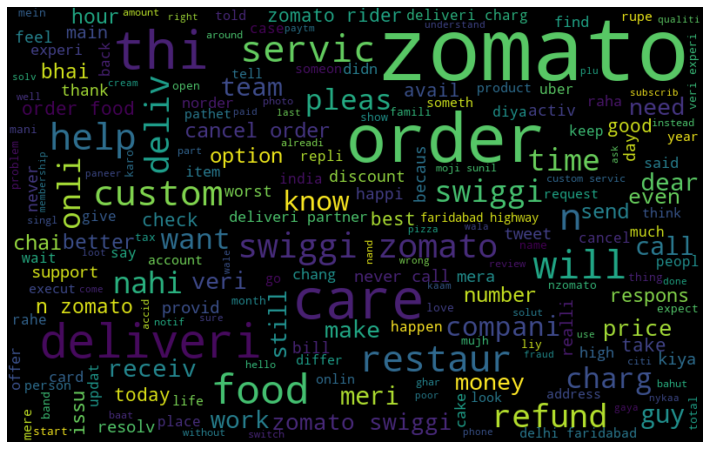

In [47]:
# word cloud
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

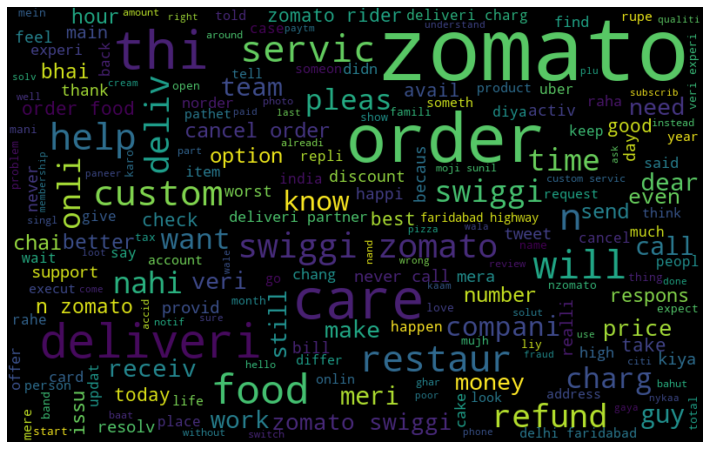

In [50]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

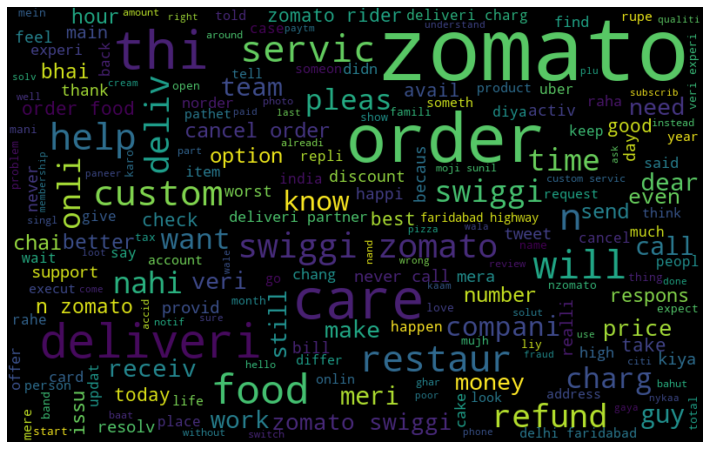

In [51]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [54]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'])

In [61]:
ht_positive[:100:10]

['breakingnew',
 'youtub',
 'zomato',
 'swiggi',
 'rannkli',
 'digitalmarket',
 'gstcouncil',
 'swiggi',
 'pathet',
 'coldpizza']

In [59]:

# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [62]:
ht_negative[:100:10]

['breakingnew',
 'youtub',
 'zomato',
 'swiggi',
 'rannkli',
 'digitalmarket',
 'gstcouncil',
 'swiggi',
 'pathet',
 'coldpizza']

In [63]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,breakingnew,2
1,justsay,1
2,zomato,61
3,swiggi,19
4,treatyourself,1


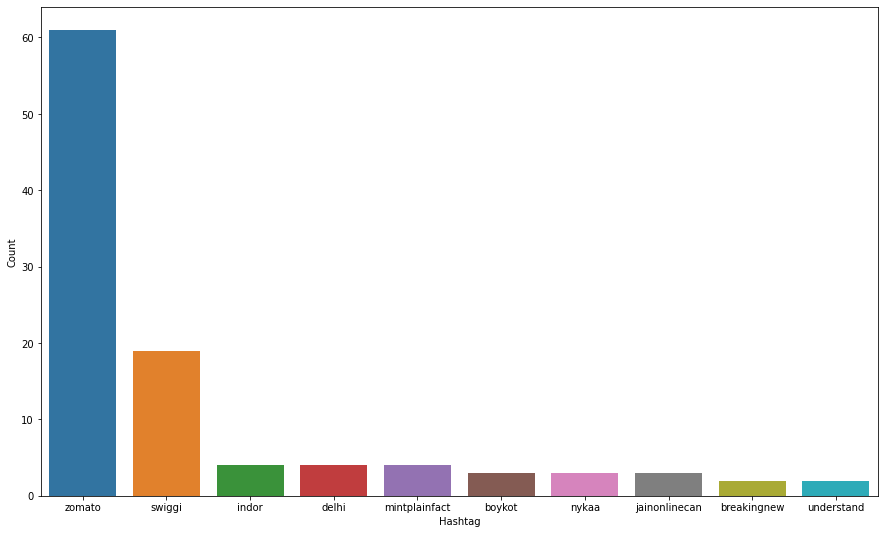

In [64]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [65]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,breakingnew,2
1,justsay,1
2,zomato,61
3,swiggi,19
4,treatyourself,1


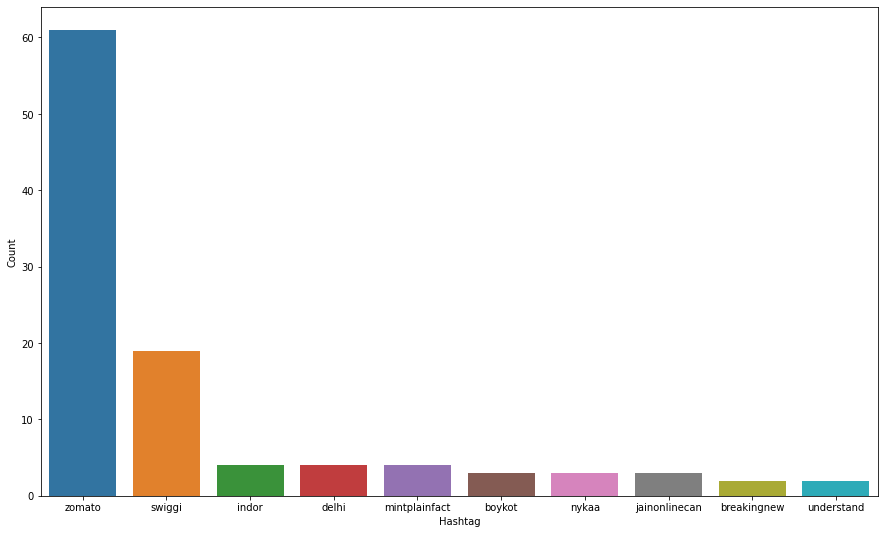

In [66]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()